In [7]:
#Task 1 ( Please Restart kernel before Executing Each Task)
import numpy as np
import random
import mnist_reader
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from itertools import zip_longest
#logistic function 
def sig(z):
    sig= 1/(1+np.exp(-z))
    return sig
#sigmoid derivative 
def sig_del(a):
    return a*(1-a)
#softmax
def softm(x):
    
    expx = np.exp(x-np.max(x))
    return expx / expx.sum(axis = 1, keepdims = True)
#loss function 
def loss(a,y):
    return np.sum(-np.log(a[range(y.shape[0]),y]))/y.shape[0]
#import 
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')
X_train_norm=X_train/255
X_test_norm=X_test/255
x1= X_train_norm
y1= y_train
epochs=500
learning_rate= 0.5
#one hot     
onehot_encoder = preprocessing.OneHotEncoder(sparse=False)
y2 = y_train.reshape(len(y_train), 1)
y2 = onehot_encoder.fit_transform(y2)
#print(y2)
    
m=y1.shape[0]
hidden_nodes=64
#weight initialization 
weights1 = np.random.randn(x1.T.shape[0],hidden_nodes) 
weights2 = np.random.randn(hidden_nodes,10) 
bias1=np.zeros(hidden_nodes)
bias2=np.zeros(10)
    
l3=[]
    #print(x1.shape)
    #print(weights1.shape)
    #print(weights2.shape)
   
    
for epoch in range(epochs):
        #foward propogation
    z1= np.matmul(x1,weights1)+ bias1
    a1= sig(z1)
        #print(a1.shape)

    z2= np.matmul(a1,weights2)+ bias2
    a2= softm(z2)
    #print(a2.shape)
    
    final_loss= loss(a2,y1)
    print("Loss",epoch,":",final_loss)
    l3.append(final_loss)
    
    #backprop
    del_z2 = a2 - y2
    #print(dz2.shape)
    del_weights2 = (1/m) * np.dot(a1.T, del_z2)
    del_bias2 = (1/m) * np.sum(del_z2,axis = 0, keepdims = True)
   
    del_a1 = np.dot(del_z2, weights2.T)
    del_z1 = del_a1 * sig_del(a1)
    del_weights1 = (1/m) * np.dot(x1.T,del_z1)
    del_bias1 = (1/m) * np.sum(del_z1,axis = 0, keepdims = True)
    
    
    weights1 = weights1 - learning_rate*del_weights1
    bias1 = bias1 - learning_rate*del_bias1
    weights2 = weights2 - learning_rate*del_weights2
    bias2 = bias2 - learning_rate*del_bias2
#prediction
temp_acc=0
y_pred=[]
for i,j in zip_longest(X_test_norm, y_test):
    z1 = np.dot(i, weights1) + bias1
    a1 = sig(z1)            
    z2 = np.dot(a1, weights2) + bias2
    a2 = softm(z2)
    predicted=np.argmax(a2)
    y_pred.append(predicted)
    if predicted == j:
        temp_acc= temp_acc+1
accuracy=(temp_acc/X_test_norm.shape[0])*100
print("Test Accuracy:", accuracy,"%")

#confusion matrix
confusion_matrix(y_test, y_pred)

Loss 0 : 6.757035336895254
Loss 1 : 5.326777996752418
Loss 2 : 4.444030780723793
Loss 3 : 3.831183364120432
Loss 4 : 3.359751836071949
Loss 5 : 3.0002847761103646
Loss 6 : 2.7440706258163345
Loss 7 : 2.5557811529301535
Loss 8 : 2.4065853408605453
Loss 9 : 2.2831074345845366
Loss 10 : 2.178705815265203
Loss 11 : 2.0894996611451178
Loss 12 : 2.0128554796208986
Loss 13 : 1.9465532888311199
Loss 14 : 1.8886165668667205


KeyboardInterrupt: 

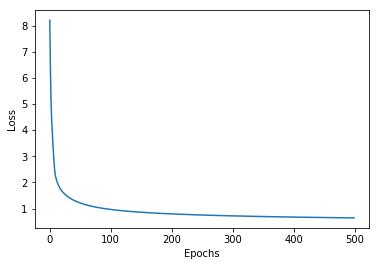

In [2]:
#Task 1 Graph 
plt.figure(1)  
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(l3)

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import tensorflow as tf
from keras.optimizers import SGD
import keras.losses
import keras.utils
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import numpy as np 
import mnist_reader
#import and normalization
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')
X_test_norm= X_test/255
X_train_norm= X_train/255
#one hot
y1= keras.utils.to_categorical(y_train)
#Model 
model = Sequential([Dense(784),Dense(128, activation=tf.nn.sigmoid), Dense(10, activation=tf.nn.softmax)])
model.compile(loss="categorical_crossentropy", optimizer="sgd",metrics=['accuracy'])
#model train
model.fit(X_train_norm,y1,epochs=40,validation_split=0.1)
#model eval
loss, accuracy = model.evaluate(X_test_norm,keras.utils.to_categorical(y_test))
#model predict 
y_pred=model.predict_classes(X_test_norm)
#confusion Matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Train on 54000 samples, validate on 6000 samples
Epoch 1/40


InternalError: Blas GEMM launch failed : a.shape=(32, 784), b.shape=(784, 784), m=32, n=784, k=784
	 [[{{node dense_3/MatMul}} = MatMul[T=DT_FLOAT, _class=["loc:@training_1/SGD/gradients/dense_3/MatMul_grad/MatMul_1"], transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_sequential_2_input_0_0/_111, dense_3/kernel/read)]]

In [ ]:
print("Accuracy:",accuracy*100)
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Loss vs Epochs")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [2]:
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Activation,Conv2D
import tensorflow as tf
from keras.optimizers import SGD
import keras.losses
import keras.utils
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np 
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')
X_train1=(np.reshape(X_train,(60000,28,28,1)))/255
X_test1=(np.reshape(X_test,(10000,28,28,1)))/255
y1= keras.utils.to_categorical(y_train)
#convolutional model 
model=Sequential()

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
#train 
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train1, y1, epochs=5, validation_split=0.1)

loss, accuracy = model.evaluate(X_test1, keras.utils.to_categorical( y_test))

y_pred=model.predict_classes(X_test1)

print("Accuracy:",test_accuracy*100)

#confusion matrix
matrix = confusion_matrix(y_test, y_pred)

print(matrix)

Using TensorFlow backend.


Train on 54000 samples, validate on 6000 samples
Epoch 1/5


UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_1/convolution}} = Conv2D[T=DT_FLOAT, _class=["loc:@training/SGD/gradients/conv2d_1/convolution_grad/Conv2DBackpropFilter"], data_format="NCHW", dilations=[1, 1, 1, 1], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](training/SGD/gradients/conv2d_1/convolution_grad/Conv2DBackpropFilter-0-TransposeNHWCToNCHW-LayoutOptimizer, conv2d_1/kernel/read)]]
	 [[{{node metrics/acc/Mean/_73}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_461_metrics/acc/Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Loss vs Epochs")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()